In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/python_data_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [16]:
df_de_da = df[(df["job_country"] == "Germany") & (df["salary_year_avg"].notna()) & (df["job_title_short"] == "Data Analyst")].copy()
df_de_da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,"[r, python, java, c#, sql]","{'programming': ['r', 'python', 'java', 'c#', ..."
51100,Data Analyst,(Senior) People Data Analyst (m/w/x),Germany,via Ai-Jobs.net,Full-time,False,Germany,2023-05-15 07:18:25,False,False,Germany,year,111175.0,NaN,Grover,"[excel, power bi]","{'analyst_tools': ['excel', 'power bi']}"
51476,Data Analyst,Head of Data Analytics,"Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-18 06:15:58,False,False,Germany,year,166419.5,NaN,Volt.io,"[sql, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
56790,Data Analyst,Data Analyst / Data Scientist eBike Systems (w...,"Kusterdingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-02-23 06:31:22,False,False,Germany,year,111175.0,NaN,Bosch Group,None,None
57582,Data Analyst,Application Consultant in Data Integration,"Hamburg, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-01-27 07:02:44,False,False,Germany,year,89100.0,NaN,Vattenfall,"[c#, sql, sql server, azure]","{'cloud': ['azure'], 'databases': ['sql server..."
58368,Data Analyst,Data Manager,"Düsseldorf, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-02-04 07:05:17,True,False,Germany,year,105650.0,NaN,Statkraft,"[python, sql, pandas, numpy, matplotlib]","{'libraries': ['pandas', 'numpy', 'matplotlib'..."
89707,Data Analyst,Manager Data Strategy - German speaking (all g...,"Düsseldorf, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-01-28 01:02:53,False,False,Germany,year,80850.0,NaN,Publicis Groupe,None,None
110336,Data Analyst,Data Operation Analyst,Germany,via Federal Government Jobs,Full-time,False,Germany,2023-06-07 00:19:05,False,False,Germany,year,56381.0,NaN,U.S. Army Medical Command,None,None
127888,Data Analyst,Data Analyst,"Stuttgart, Germany",via Ai-Jobs.net,Contractor,False,Germany,2023-07-28 08:21:07,False,False,Germany,year,111175.0,NaN,Barbaricum,"[python, javascript, r, sql, go, react, flask]","{'libraries': ['react'], 'programming': ['pyth..."
137735,Data Analyst,Data Manager (m/w/d),"Darmstadt, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-02-23 08:31:28,False,False,Germany,year,105650.0,NaN,Dun & Bradstreet,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."


In [17]:
df_de_exploded = df_de_da.explode("job_skills")
df_de_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,r,"{'programming': ['r', 'python', 'java', 'c#', ..."
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,python,"{'programming': ['r', 'python', 'java', 'c#', ..."
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,java,"{'programming': ['r', 'python', 'java', 'c#', ..."
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,c#,"{'programming': ['r', 'python', 'java', 'c#', ..."
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,sql,"{'programming': ['r', 'python', 'java', 'c#', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770282,Data Analyst,Head of Data Analytics (F/M/X),"Munich, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-01-19 01:22:42,False,False,Germany,year,166419.5,NaN,PPRO,tableau,"{'analyst_tools': ['looker', 'tableau'], 'clou..."
770282,Data Analyst,Head of Data Analytics (F/M/X),"Munich, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-01-19 01:22:42,False,False,Germany,year,166419.5,NaN,PPRO,terraform,"{'analyst_tools': ['looker', 'tableau'], 'clou..."
781105,Data Analyst,Data Analyst,"Munich, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-05 06:34:08,False,False,Germany,year,111175.0,NaN,Lilium,python,"{'libraries': ['pyspark'], 'other': ['terminal..."
781105,Data Analyst,Data Analyst,"Munich, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-05 06:34:08,False,False,Germany,year,111175.0,NaN,Lilium,pyspark,"{'libraries': ['pyspark'], 'other': ['terminal..."


In [19]:
df_top_paying_skills = (df_de_exploded
                        .groupby("job_skills")["salary_year_avg"]
                        .agg(["count", "median"])
                        .sort_values(by="median", ascending=False)
                        .head(10)
                      )
df_top_paying_skills

,count,median
job_skills,,
github,3,199675.0
terraform,1,166419.5
bigquery,1,166419.5
redshift,1,166419.5
nosql,1,166419.5
kafka,1,166419.5
gcp,3,165000.0
javascript,1,111175.0
terminal,1,111175.0


In [35]:
df_top_asked_skills = (
  df_de_exploded.groupby("job_skills")["salary_year_avg"]
  .agg(["count", "median"])
  .sort_values(by="count", ascending=False)
  .head(10)
)
df_top_asked_skills

,count,median
job_skills,,
sql,24,101500.0
python,18,111175.0
tableau,13,100500.0
spark,7,111175.0
r,7,75067.5
excel,7,105650.0
looker,5,53014.0
power bi,4,83937.5
go,4,52014.0


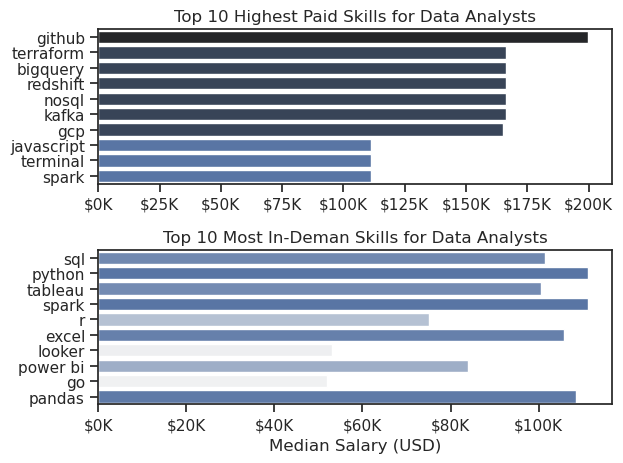

In [38]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

sns.barplot(
  df_top_paying_skills, 
  x="median", 
  y=df_top_paying_skills.index, 
  hue="median", 
  palette="dark:b_r", 
  ax=ax[0],
  legend=False
)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f"${int(val/1000)}K"))

sns.barplot(
  df_top_asked_skills, 
  x="median", 
  y=df_top_asked_skills.index, 
  hue="median", 
  palette="light:b", 
  ax=ax[1],
  legend=False
)
ax[1].set_title("Top 10 Most In-Deman Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f"${int(val/1000)}K"))

plt.tight_layout()

plt.show()